# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="./Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
print(states)
state_size = states.shape[1]
print('\nThere are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
critic_size = num_agents * state_size
print('This is the critic_size: {}'. format(critic_size))

Number of agents: 2
Size of each action: 2
[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.         -6.65278625 -1.5
  -0.          0.          6.83172083  6.         -0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.         -6.4669857  -1.5
   0.          0.         -6.83172083  6.          0.          0.        ]]

There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
This is the critic_size: 48


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
# for i in range(1, 6):                                      # play game for 5 episodes
#     env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#     states = env_info.vector_observations                  # get the current state (for each agent)
#     scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#     while True:
#         actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#         actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#         env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#         next_states = env_info.vector_observations         # get next state (for each agent)
#         rewards = env_info.rewards                         # get reward (for each agent)
#         dones = env_info.local_done                        # see if episode finished
#         scores += env_info.rewards                         # update the score (for each agent)
#         states = next_states                               # roll over states to next time step
#         if np.any(dones):                                  # exit loop if episode finished
#             break
#     print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))


When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
from collections import deque
from itertools import count
import torch
import matplotlib.pyplot as plt
%matplotlib inline
import gym
import random
import torch
import numpy as np

In [11]:
from maddpg import MADDPG
the_agents = MADDPG(state_size, action_size, 2, num_agents)
checkpoint_actor = 'checkpoint_actor_cuda.pth'
checkpoint_critic = 'checkpoint_critic_cuda.pth'
def maddpg(n_episodes=5000, max_t=1000):
    scores_deque = deque(maxlen=100)
    scores_all = []
    scores = []
    max_score = -np.Inf
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]        
        states = np.reshape(env_info.vector_observations, (1, state_size * num_agents))  # get states and combine them

        the_agents.reset()
        scores = np.zeros(num_agents)
        while True:
            actions = the_agents.all_agents_act(states)
            env_info = env.step(actions)[brain_name]                             # send all actions to the environment
            
            # get next state (for each agent)
            next_states = np.reshape(env_info.vector_observations, (1, state_size * num_agents)) 
            rewards = env_info.rewards                                           # get reward (for each agent)
            scores += np.max(rewards)                                            # update the score (for each agent)
            dones = env_info.local_done                                          # see if episode finished
            the_agents.step(states, actions, rewards, next_states, dones)
            states = next_states
            if np.any(dones):                                                     # exit loop if episode finished
                break
                
        score_max = np.max(scores)            
        scores_deque.append(score_max)
        scores_all.append(score_max)
        
        print('\rEpisode {}\tAverage Score: {:.3f}\tScore: {:.3f}'.format(i_episode, np.mean(scores_deque), score_max), end="")                    
        if i_episode % 100 == 0:
            if np.mean(scores_deque) >= 0.5:
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.3f}'.format(i_episode, np.mean(scores_deque)))
                for agent in the_agents.agents:
                    torch.save(agent.actor_local.state_dict(), checkpoint_actor)
                    torch.save(agent.critic_local.state_dict(), checkpoint_critic)
                break
            else:
                for agent_index, agent in enumerate(the_agents.agents):
                    torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_{}.pth'.format(agent_index))
                    torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_{}.pth'.format(agent_index))
                print('\rEpisode {}\tAverage Score: {:.3f}'.format(i_episode, np.mean(scores_deque)))
    return scores_all


In [12]:
# # MADDPG function without using the MADDPG Manager class
# from maddpg_agent import Agent
# SOLVED_SCORE = 0.5
# CONSEC_EPISODES = 100
# PRINT_EVERY = 10
# ADD_NOISE = True
# def maddpg(n_episodes=2000, max_t=1000, train_mode=True):
#     """Multi-Agent Deep Deterministic Policy Gradient (MADDPG)
    
#     Params
#     ======
#         n_episodes (int)      : maximum number of training episodes
#         max_t (int)           : maximum number of timesteps per episode
#         train_mode (bool)     : if 'True' set environment to training mode

#     """
#     scores_window = deque(maxlen=CONSEC_EPISODES)
#     scores_all = []
#     moving_average = []
#     best_score = -np.inf
#     best_episode = 0
#     already_solved = False    

#     for i_episode in range(1, n_episodes+1):
#         env_info = env.reset(train_mode=train_mode)[brain_name]         # reset the environment
#         states = np.reshape(env_info.vector_observations, (1,48)) # get states and combine them
#         agent_0.reset()
#         agent_1.reset()
#         scores = np.zeros(num_agents)
#         while True:
#             actions = get_actions(states, ADD_NOISE)           # choose agent actions and combine them
#             env_info = env.step(actions)[brain_name]           # send both agents' actions together to the environment
#             next_states = np.reshape(env_info.vector_observations, (1, 48)) # combine the agent next states
#             rewards = env_info.rewards                         # get reward
#             done = env_info.local_done                         # see if episode finished
#             agent_0.step(states, actions, rewards[0], next_states, done, 0) # agent 1 learns
#             agent_1.step(states, actions, rewards[1], next_states, done, 1) # agent 2 learns
#             scores += np.max(rewards)                          # update the score for each agent
#             states = next_states                               # roll over states to next time step
#             if np.any(done):                                   # exit loop if episode finished
#                 break

#         ep_best_score = np.max(scores)
#         scores_window.append(ep_best_score)
#         scores_all.append(ep_best_score)
#         moving_average.append(np.mean(scores_window))

#         # save best score                        
#         if ep_best_score > best_score:
#             best_score = ep_best_score
#             best_episode = i_episode
        
#         # print results
#         if i_episode % PRINT_EVERY == 0:
#             print('Episodes {:0>4d}-{:0>4d}\tMax Reward: {:.3f}\tMoving Average: {:.3f}'.format(
#                 i_episode-PRINT_EVERY, i_episode, np.max(scores_all[-PRINT_EVERY:]), moving_average[-1]))

#         # determine if environment is solved and keep best performing models
#         if moving_average[-1] >= SOLVED_SCORE:
#             if not already_solved:
#                 print('<-- Environment solved in {:d} episodes! \
#                 \n<-- Moving Average: {:.3f} over past {:d} episodes'.format(
#                     i_episode-CONSEC_EPISODES, moving_average[-1], CONSEC_EPISODES))
#                 already_solved = True
#                 # save weights
#                 torch.save(agent_0.actor_local.state_dict(), 'models/checkpoint_actor_0.pth')
#                 torch.save(agent_0.critic_local.state_dict(), 'models/checkpoint_critic_0.pth')
#                 torch.save(agent_1.actor_local.state_dict(), 'models/checkpoint_actor_1.pth')
#                 torch.save(agent_1.critic_local.state_dict(), 'models/checkpoint_critic_1.pth')
#             elif ep_best_score >= best_score:
#                 print('<-- Best episode so far!\
#                 \nEpisode {:0>4d}\tMax Reward: {:.3f}\tMoving Average: {:.3f}'.format(
#                 i_episode, ep_best_score, moving_average[-1]))
#                 # save weights
#                 torch.save(agent_0.actor_local.state_dict(), 'models/checkpoint_actor_0.pth')
#                 torch.save(agent_0.critic_local.state_dict(), 'models/checkpoint_critic_0.pth')
#                 torch.save(agent_1.actor_local.state_dict(), 'models/checkpoint_actor_1.pth')
#                 torch.save(agent_1.critic_local.state_dict(), 'models/checkpoint_critic_1.pth')
#             elif (i_episode-best_episode) >= 200:
#                 # stop training if model stops converging
#                 print('<-- Training stopped. Best score not matched or exceeded for 200 episodes')
#                 break
#             else:
#                 continue
            
#     return scores_all, moving_average

# def get_actions(states, add_noise):
#     '''gets actions for each agent and then combines them into one array'''
#     print(states)
#     action_0 = agent_0.act(states, add_noise)    # agent 0 chooses an action
#     action_1 = agent_1.act(states, add_noise)    # agent 1 chooses an action
#     return np.concatenate((action_0, action_1), axis=0).flatten()
# initialize agents
# agent_0 = Agent(state_size, action_size, num_agents=1, random_seed=0)
# agent_1 = Agent(state_size, action_size, num_agents=1, random_seed=0)

Episode 100	Average Score: 0.010	Score: 0.000
Episode 200	Average Score: 0.044	Score: 0.000
Episode 300	Average Score: 0.037	Score: 0.100
Episode 400	Average Score: 0.081	Score: 0.100
Episode 500	Average Score: 0.098	Score: 0.200
Episode 600	Average Score: 0.116	Score: 0.100
Episode 700	Average Score: 0.148	Score: 0.100
Episode 800	Average Score: 0.148	Score: 0.200
Episode 900	Average Score: 0.198	Score: 0.200
Episode 1000	Average Score: 0.208	Score: 0.100
Episode 1100	Average Score: 0.210	Score: 0.300
Episode 1200	Average Score: 0.143	Score: 0.300
Episode 1300	Average Score: 0.098	Score: 0.100
Episode 1400	Average Score: 0.101	Score: 0.000
Episode 1500	Average Score: 0.053	Score: 0.200
Episode 1600	Average Score: 0.256	Score: 0.000
Episode 1700	Average Score: 0.186	Score: 0.200
Episode 1800	Average Score: 0.480	Score: 3.400
Episode 1900	Average Score: 0.496	Score: 0.300
Episode 2000	Average Score: 0.392	Score: 0.100
Episode 2100	Average Score: 0.309	Score: 0.900
Episode 2200	Average S

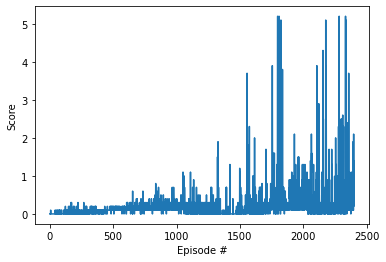

In [13]:
scores = maddpg()
        
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
from unityagents import UnityEnvironment

from collections import deque
from itertools import count
import torch
import matplotlib.pyplot as plt
%matplotlib inline
import gym
import random
import torch
import numpy as np
from maddpg_agent import Agent

env = UnityEnvironment(file_name="./Tennis_Windows_x86_64/Tennis.exe")

In [7]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)

# size of each action
action_size = brain.vector_action_space_size

# examine the state space 
states = env_info.vector_observations

state_size = states.shape[1]
critic_size = num_agents * state_size

agents = []
for i in range(num_agents):
    agent = Agent(state_size, action_size, 2, num_agents)
    agents.append(agent)


for agent_index, agent in enumerate(agents):
    agent.actor_local.load_state_dict(torch.load('checkpoint_actor_{}.pth'.format(agent_index)))
    agent.critic_local.load_state_dict(torch.load('checkpoint_critic_{}.pth'.format(agent_index)))
    

states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = np.reshape(env_info.vector_observations, (1, state_size * num_agents)) # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        action_0 = agents[0].act(states, add_noise=False)
        action_1 = agents[1].act(states, add_noise=False)
        actions = np.concatenate((action_0, action_1), axis=0).flatten()
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = np.reshape(env_info.vector_observations, (1, state_size * num_agents)) # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores))) 

env.close()

Score (max over agents) from episode 1: 2.600000038743019
Score (max over agents) from episode 2: 2.7000000402331352
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.10000000149011612
Score (max over agents) from episode 5: 2.2000000327825546
